<a href="https://colab.research.google.com/github/EshithaReddy/biomedical/blob/main/Bliss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hill(E0=1.00, Emax=0.50, h=2.30, C=1.00e-02)


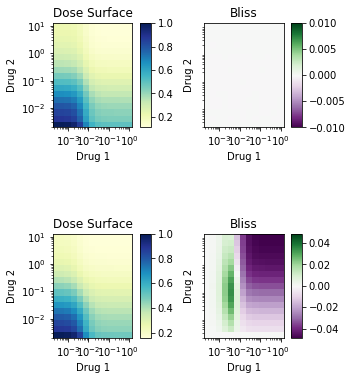

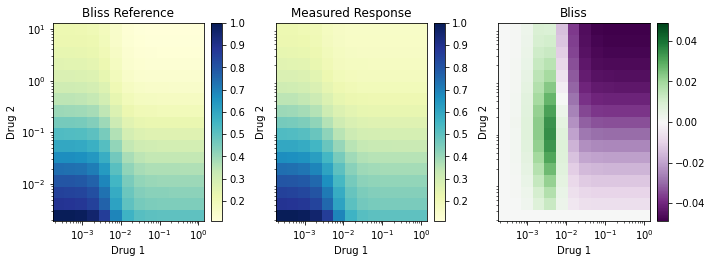

In [ ]:
pip install synergy
import numpy as np
from synergy.single import Hill
from synergy.combination import MuSyC
from synergy.combination import Bliss
from synergy.utils import plots

from synergy.utils.dose_tools import grid

from matplotlib import pyplot as plt

E0, E1, E2, E3 = 1, 0.5, 0.2, 0.1
h1, h2 = 2.3, 0.8
C1, C2 = 1e-2, 1e-1
alpha12, alpha21 = 1., 1.
gamma12, gamma21 = 1., 1.

model = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3, h1=h1, h2=h2, C1=C1, C2=C2, alpha12=alpha12, alpha21=alpha21, gamma12=gamma12, gamma21=gamma21)

model2 = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3*1.5, h1=h1, h2=h2, C1=C1, C2=C2, alpha12=alpha12, alpha21=alpha21*2, gamma12=gamma12, gamma21=gamma21)

drug1 = Hill(E0=E0, Emax=E1, h=h1, C=C1)
drug2 = Hill(E0=E0, Emax=E2, h=h2, C=C2)

npoints = 12
npoints2 = 16


D1, D2 = grid(1e-3, 1, 1e-2, 10, npoints, npoints2, include_zero=True)

E = model.E(D1, D2)
E_2 = model2.E(D1, D2)

bliss = Bliss()
bliss2 = Bliss()
bliss.fit(D1, D2, E, drug1_model=drug1, drug2_model=drug2)
bliss2.fit(D1, D2, E_2, drug1_model=drug1, drug2_model=drug2)

fig = plt.figure(figsize=(5,6))

ax = fig.add_subplot(2,2,1)
model.plot_heatmap(D1, D2, ax=ax,title="Dose Surface")

ax = fig.add_subplot(2,2,2)
bliss.plot_heatmap(ax=ax, title="Bliss", vmin=-0.01, vmax=0.01)
ax.set_yticks([])

ax = fig.add_subplot(2,2,3)
model2.plot_heatmap(D1, D2, ax=ax, title="Dose Surface")

ax = fig.add_subplot(2,2,4)
bliss2.plot_heatmap(ax=ax, title="Bliss", center_on_zero=True)
ax.set_yticks([])

plt.tight_layout()



fig = plt.figure(figsize=(10,4))

vmin = min(np.nanmin(E), np.nanmin(bliss2.reference))
vmax = max(np.nanmax(E), np.nanmax(bliss2.reference))

ax = fig.add_subplot(1,3,1)
bliss2.plot_reference_heatmap(ax=ax, title="Bliss Reference", vmin=vmin, vmax=vmax)

ax = fig.add_subplot(1,3,2)
model2.plot_heatmap(D1, D2, ax=ax, title="Measured Response", vmin=vmin, vmax=vmax)
ax.set_yticks([])

ax = fig.add_subplot(1,3,3)
bliss2.plot_heatmap(ax=ax, title="Bliss", center_on_zero=True)
ax.set_yticks([])
plt.tight_layout()
plt.show()